# 1.自定义语料，生成句子

In [5]:
#系统授权用户
admin = """
admin = 称呼 目标 活动 
称呼 = 艾拉, | 艾拉你好, | null
目标 = 介词 受众 | null
介词 = 给 | 帮
受众 = 我 | 他人 
他人 = 王先生 | 李小姐 | 小周 | 小赵
活动 = 工作活动 | 日常活动
工作活动 = 工作动作 工作内容
工作动作 = 发送 | 写 | 回复
工作内容 = 一封邮件 | 一条信息
日常活动 = 启停 电器 | 控制描述
启停 = 打开 | 关闭 |  开 | 关 
电器 = 空调 | 灯 | 空净 | 热水器 | 电视
控制描述 = 空调控制 | 灯控制 | 空净控制 | 热水器控制 | 电视控制
空调控制 = 空调 温度操作 空调温度 
温度操作 = 调至 | 调到 | 设定为 
空调温度 = 18度 | 19度 | 20度 | 21度 | 22度 | 23度 | 24度 | 25度
灯控制 = 灯 灯操作 光度量
灯操作 = 亮 | 暗 | 调亮 | 调暗 | 强 | 弱
光度量 = 一些 | 一点
空净控制 = 空净 空净操作 空净功能
空净操作 = 启动 | 关闭
空净功能 = 净化模式 | 除湿模式 | 静音模式
热水器控制 = 热水器 温度操作 热水温度
热水温度 = 38度 | 40度 | 42度 | 44度 | 46度 | 48度 | 50度
电视控制 = 电视 温度操作 频道
频道 = 1频道 | 2频道 | 3频道 | 4频道 | 5频道 | 6频道 | 7频道 | 8频道
"""
#智能语音机器人Ela
Ela = """
Ela = 汇报
汇报 = 接受任务 电器 电气操作 状态 | 工作活动
接受任务 = 收到, | 遵命, | 没问题, | 好的, | OK, | Bingo,
信息接入 = 滴哒, | 主人, | 诶,
电器 = 空调 | 灯光 | 空净 | 热水器 | 电视
电气操作 = 设定 | 设置 | 调节
状态 = 完毕 | 完成 | 结束 | Over
工作活动 = TX | RX
TX = 接受任务 TX操作 他人 工作内容
RX = 信息接入 RX操作 他人 工作内容
TX操作 = 发送给 | 回复了
RX操作 = 接收到 | 收到
他人 = 王先生 | 李小姐 | 小周 | 小赵
工作内容 = 一封邮件 | 一条信息 
"""

In [6]:
import random


In [7]:
def grammar(material,com_mark='\n',spec_mark='=>'):
    gram = {}
    for entry in material.split(com_mark):            #按\n划分各行
        if not entry.strip(): continue                      #滤掉非空格或\n
        rule,value = entry.split(spec_mark)
        rule = rule.strip()
        value = value.strip()
        gram[rule] = [v.split() for v in value.split('|')]  #得到语法结构
    return gram

In [8]:
def generator(gram = {},target = 'sentence'): 
    result = ''
    if target not in gram:
        return target
    recv = [generator(gram,t) for t in random.choice(gram[target])]
    result = ''.join([r for r in recv if r!='null'])
    return result

In [9]:
grammar(admin,spec_mark='=')

{'admin': [['称呼', '目标', '活动']],
 '称呼': [['艾拉,'], ['艾拉你好,'], ['null']],
 '目标': [['介词', '受众'], ['null']],
 '介词': [['给'], ['帮']],
 '受众': [['我'], ['他人']],
 '他人': [['王先生'], ['李小姐'], ['小周'], ['小赵']],
 '活动': [['工作活动'], ['日常活动']],
 '工作活动': [['工作动作', '工作内容']],
 '工作动作': [['发送'], ['写'], ['回复']],
 '工作内容': [['一封邮件'], ['一条信息']],
 '日常活动': [['启停', '电器'], ['控制描述']],
 '启停': [['打开'], ['关闭'], ['开'], ['关']],
 '电器': [['空调'], ['灯'], ['空净'], ['热水器'], ['电视']],
 '控制描述': [['空调控制'], ['灯控制'], ['空净控制'], ['热水器控制'], ['电视控制']],
 '空调控制': [['空调', '温度操作', '空调温度']],
 '温度操作': [['调至'], ['调到'], ['设定为']],
 '空调温度': [['18度'],
  ['19度'],
  ['20度'],
  ['21度'],
  ['22度'],
  ['23度'],
  ['24度'],
  ['25度']],
 '灯控制': [['灯', '灯操作', '光度量']],
 '灯操作': [['亮'], ['暗'], ['调亮'], ['调暗'], ['强'], ['弱']],
 '光度量': [['一些'], ['一点']],
 '空净控制': [['空净', '空净操作', '空净功能']],
 '空净操作': [['启动'], ['关闭']],
 '空净功能': [['净化模式'], ['除湿模式'], ['静音模式']],
 '热水器控制': [['热水器', '温度操作', '热水温度']],
 '热水温度': [['38度'], ['40度'], ['42度'], ['44度'], ['46度'], ['48度'], ['50度']],
 '电视控制

In [10]:
generator(grammar(admin,spec_mark='='),'admin')

'给王先生电视设定为6频道'

In [11]:
generator(grammar(Ela,spec_mark='='),'Ela')

'好的,回复了小周一封邮件'

In [12]:
def generator_n(n):
    sen = []
    #print('Admin生成{}个句子:'.format(n))
    #print('')
    for i in range(n):
        s = generator(grammar(admin,spec_mark='='),'admin')
        sen+=[s]
        #print(s)
    #print('')
    #print('Ela生成{}个句子:'.format(n))
    #print('')
    for i in range(n):
        s = generator(grammar(Ela,spec_mark='='),'Ela')
        sen+=[s]
        #print(s)
    return sen

In [13]:
generator_n(20)

['艾拉你好,帮我回复一条信息',
 '艾拉你好,给小赵开电视',
 '给我回复一条信息',
 '帮小赵空净启动净化模式',
 '帮我灯暗一点',
 '帮我空净启动净化模式',
 '艾拉,热水器设定为48度',
 '艾拉,帮小周关闭空调',
 '艾拉你好,回复一条信息',
 '给我回复一条信息',
 '艾拉,给我写一条信息',
 '艾拉你好,灯强一点',
 '电视调至6频道',
 '艾拉,给我热水器设定为50度',
 '空调调到18度',
 '艾拉你好,开灯',
 '关空调',
 '艾拉你好,写一封邮件',
 '艾拉,灯调暗一点',
 '艾拉你好,回复一封邮件',
 '滴哒,收到李小姐一封邮件',
 '没问题,空净设置结束',
 '收到,发送给小赵一条信息',
 '滴哒,收到王先生一条信息',
 '诶,接收到王先生一条信息',
 '没问题,空调设定完成',
 '收到,空调调节完毕',
 'OK,热水器设置结束',
 '收到,热水器调节结束',
 '没问题,灯光调节结束',
 '没问题,回复了王先生一条信息',
 '诶,收到小赵一封邮件',
 '滴哒,接收到李小姐一条信息',
 '遵命,灯光设置完成',
 '诶,收到小周一条信息',
 '没问题,发送给王先生一封邮件',
 'OK,电视设定结束',
 '收到,空净设置完成',
 '遵命,电视设置结束',
 'Bingo,热水器设定结束']

# 2. 处理新语料，训练模型

### 保险行业问询对话集

In [14]:
with open('train.txt','r',encoding = 'UTF-8') as file:
    raw = file.read()
    print(len(raw))
    print(raw[:500])
    

1343520
0 ++$++ disability-insurance ++$++ 法律要求残疾保险吗？ ++$++ Is  Disability  Insurance  Required  By  Law?
1 ++$++ life-insurance ++$++ 债权人可以在死后人寿保险吗？ ++$++ Can  Creditors  Take  Life  Insurance  After  Death?
2 ++$++ renters-insurance ++$++ 旅行者保险有租赁保险吗？ ++$++ Does  Travelers  Insurance  Have  Renters  Insurance?
3 ++$++ auto-insurance ++$++ 我可以开一辆没有保险的新车吗？ ++$++ Can  I  Drive  A  New  Car  Home  Without  Insurance?
4 ++$++ life-insurance ++$++ 人寿保险的现金转出价值是否应纳税？ ++$++ Is  The  Cash  Surrender  Value  Of 


In [15]:
import re
insu_txt = [re.sub('[\W+0-9a-zA-Z]','',raw)]

In [16]:
len(insu_txt[0])

145084

### 豆瓣电影评论集

In [17]:
import pandas as pd

In [18]:
gen = pd.read_csv('movie_comments.csv',iterator = True)

In [19]:
i = 0
comment_txt = []
while True:
    try:
        #df = gen.get_chunk(1000)['comment']
        seg = [''.join([re.sub('[\W+a-zA-Z0-9]','',''.join(gen.get_chunk(1000)['comment'].tolist()))])]
        comment_txt = [''.join(comment_txt+seg)]
        i+=1
        if i <10:
            print(comment_txt)
    except StopIteration:
        print('{}block is processed....'.format(i))
        break
    except TypeError:
        #print('segment:',seg,type(seg),type(seg[0]))
        comment_txt = [''.join(comment_txt+seg)]
        continue

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



261block is processed....


In [20]:
len(comment_txt[0])

7492366

### 合并两个数集

In [21]:
train_data = ''.join(insu_txt + comment_txt)

In [22]:
len(train_data)

7637450

### 对train集进行jieba分词

In [23]:
import jieba
def cut(str):
    return jieba.lcut(str)

In [24]:
TOKEN = cut(train_data)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ENOCH\AppData\Local\Temp\jieba.cache
Loading model cost 0.592 seconds.
Prefix dict has been built succesfully.


In [25]:
TOKEN[:20]

['法律',
 '要求',
 '残疾',
 '保险',
 '吗',
 '债权人',
 '可以',
 '在',
 '死',
 '后',
 '人寿保险',
 '吗',
 '旅行者',
 '保险',
 '有',
 '租赁',
 '保险',
 '吗',
 '我',
 '可以']

### 统计单个词词频

In [26]:
from collections import Counter as cnt
word_cnt = cnt(TOKEN)

In [27]:
word_cnt.most_common(20)

[('的', 331369),
 ('了', 102598),
 ('是', 75867),
 ('我', 52631),
 ('都', 36276),
 ('很', 34813),
 ('看', 33801),
 ('电影', 33640),
 ('在', 32100),
 ('也', 32099),
 ('和', 31404),
 ('不', 28634),
 ('有', 28619),
 ('就', 25682),
 ('人', 23859),
 ('好', 22689),
 ('啊', 20787),
 ('你', 18137),
 ('这', 17931),
 ('一个', 17567)]

In [28]:
len(TOKEN)

4478587

### 2-gram合词

In [29]:
def TOKEN_2gram(token=[]):
    return [''.join(token[i]+token[i+1]) for i in range(len(token[:-1]))]

In [30]:
TOKEN_2 = TOKEN_2gram(TOKEN)

In [31]:
TOKEN_2[:20]

['法律要求',
 '要求残疾',
 '残疾保险',
 '保险吗',
 '吗债权人',
 '债权人可以',
 '可以在',
 '在死',
 '死后',
 '后人寿保险',
 '人寿保险吗',
 '吗旅行者',
 '旅行者保险',
 '保险有',
 '有租赁',
 '租赁保险',
 '保险吗',
 '吗我',
 '我可以',
 '可以开']

### 统计2-gram词频

In [32]:
word_2_cnt = cnt(TOKEN_2)

In [33]:
word_2_cnt.most_common(20)

[('的电影', 8674),
 ('看的', 7144),
 ('都是', 6335),
 ('让人', 5275),
 ('的故事', 4725),
 ('看了', 4545),
 ('的是', 4435),
 ('的时候', 4421),
 ('也是', 4409),
 ('的人', 4365),
 ('我的', 4235),
 ('看完', 3725),
 ('的片子', 3358),
 ('让我', 3279),
 ('这样的', 2858),
 ('这部电影', 2724),
 ('很好', 2620),
 ('电影的', 2575),
 ('不知道', 2538),
 ('的感觉', 2511)]

### 单个word出现概率----P(Wn)

In [34]:
def prob1(word=''):
    if word not in word_cnt: 
        #print(word,'is not in Token!')
        return 1/len(TOKEN)
    return word_cnt[word]/len(TOKEN) 

### P(Wn|Wn-1) = P(WnWn-1)/P(Wn-1)

In [35]:
def prob2(word1,word2):     #计算P(W2|W1) = P(W1W2)/P(W1)
    if word1+word2 in TOKEN_2:
        return word_2_cnt[word1+word2]/len(TOKEN_2)/prob1(word1)
        #return word_2_cnt[word1+word2]/len(TOKEN_2)            
    else :
        return 1/len(TOKEN_2)/prob1(word1)
        #return 1/len(TOKEN_2)

### 以2-gram模型计算句子概率
$$ 2-gram: Pr(w_1 w_2 w_3 ... w_n) \sim Pr(w_1) * Pr(w_2 | w_1 ) * P(w3 | w_2 ) * ... * Pr(w_(n-1) | w_n) $$

In [36]:
def prob_sentence(str,scheme = '2gram'):
    str_token = cut(str)
    prob = 1
    if scheme == '2gram':
        for i,word in enumerate(str_token[:-1]):
            if i == 0 :
                prob*=prob1(word)
            else :
                word_ = str_token[i+1]
                prob*=prob2(word,word_)
    elif scheme == '3gram':
        for i,word in enumerate(str_token[:-2]):
            if i == 0:
                word1 = str_token[i+1]
                prob *= prob2(word,word1)*prob1(word)
            else :
                word1 = str_token[i+1]
                word2 = str_token[i+2]
                prob *= prob3(word,word1,word2)
    return prob

### 获得生成句组的概率

In [37]:
def probs(sens = [],scheme='2gram'):
    pbs = []
    i = 0
    for sen in sens:
        p = prob_sentence(sen,scheme)
        pbs+= [p]
        i+=1
        #print('>>>P(\'{}\') = {}'.format(sen,p))
        print('\r Counting Probility for %s .... %.1f%%'%(scheme,i/len(sens)*100),end = '')
    return list(zip(sens,pbs))  

In [38]:
pbs = probs(generator_n(20))

 Counting Probility for 2gram .... 100.0%

In [39]:
def generate_best(pbs):
    best = sorted(pbs,key=lambda x:x[1],reverse=True)[0]
    print('最合理的句子：{}\n其概率：{}'.format(best[0],best[1]))
    return sorted(pbs,key=lambda x:x[1],reverse=True)

In [40]:
generate_best(pbs)

最合理的句子：打开空调
其概率：3.8404970139019296e-05


[('打开空调', 3.8404970139019296e-05),
 ('给李小姐打开热水器', 1.3338671051910428e-05),
 ('热水器调到46度', 6.698544294682028e-07),
 ('灯强一些', 2.2328471011057728e-07),
 ('帮小周关闭热水器', 1.5948911426189297e-08),
 ('主人,收到李小姐一封邮件', 1.2086647524683127e-08),
 ('没问题,热水器调节完成', 9.033573319520946e-09),
 ('收到,发送给王先生一条信息', 8.986699145368929e-09),
 ('艾拉,关热水器', 3.5442033305195906e-09),
 ('给我空净启动除湿模式', 3.353175074461036e-09),
 ('主人,收到小赵一封邮件', 2.4173295049366253e-09),
 ('艾拉你好,开空净', 2.126521998311754e-09),
 ('OK,热水器调节结束', 1.9586391199897314e-09),
 ('遵命,发送给小赵一封邮件', 1.6539622928513753e-09),
 ('收到,灯光设置完成', 2.324254369592459e-10),
 ('帮我热水器调至40度', 1.6474886132266797e-10),
 ('艾拉你好,空净关闭除湿模式', 1.518945301979953e-10),
 ('好的,发送给王先生一封邮件', 1.415595561204289e-10),
 ('艾拉,回复一条信息', 6.912843952904932e-11),
 ('没问题,空调设置结束', 6.450531527875901e-11),
 ('好的,灯光调节完毕', 8.295403498281714e-12),
 ('艾拉,给王先生开空净', 5.432721646686846e-12),
 ('遵命,灯光设置结束', 4.469719941523959e-12),
 ('好的,热水器设定完毕', 2.1340631836031825e-12),
 ('遵命,灯光设定结束', 1.927894279635543e-12),
 

### 尝试3-gram

In [42]:
def TOKEN_3_gram(token):
    return [''.join(token[i]+token[i+1]+token[i+2]) for i in range(len(token[:-2]))]

In [43]:
TOKEN_3 = TOKEN_3_gram(TOKEN)

In [44]:
word_3_cnt = cnt(TOKEN_3)

In [45]:
word_3_cnt.most_common(20)

[('看完了', 697),
 ('每个人都', 627),
 ('最喜欢的', 600),
 ('挺好的', 555),
 ('看的时候', 540),
 ('很好的', 523),
 ('的一部电影', 453),
 ('的都是', 432),
 ('还是不错的', 419),
 ('就好了', 408),
 ('挺好看的', 406),
 ('的时候我', 404),
 ('保险是否覆盖', 401),
 ('长期护理保险', 366),
 ('更多的', 360),
 ('是我的', 349),
 ('我看的', 347),
 ('哈哈哈哈哈哈哈哈哈', 346),
 ('去看的', 341),
 ('这样的电影', 337)]

### P(Wn|Wn-1Wn-2) = P(WnWn-1Wn-2)/P(Wn-1Wn-2)
$$ 3-gram: Pr(w_1 w_2 w_3 ... w_n) \sim Pr(w_1w2) * Pr(w_3 | w_2 w_1 ) * ... * Pr(w_(n) |w(n-1)w(n-2)) $$

In [46]:
def prob3(word1,word2,word3):
    if word1+word2+word3 in word_3_cnt: return word_3_cnt[word1+word2+word3]/len(TOKEN_3)/prob2(word1,word2)/prob1(word1)
    else: return 1/len(TOKEN_3)/prob2(word1,word2)/prob1(word1)

In [47]:
ses = generator_n(20)

In [48]:
def comp2and3(ses):
    pbs2 = probs(ses,scheme='2gram')
    pbs3 = probs(ses,scheme='3gram')
    for i in range(len(ses)):
        print('{}:P2 ={}...P3={}'.format(pbs2[i][0],pbs2[i][1],pbs3[i][1]))

In [49]:
comp2and3(ses)

 Counting Probility for 3gram .... 100.0%艾拉你好,帮李小姐灯暗一些:P2 =9.126709968978258e-12...P3=2.232849593910977e-07
艾拉你好,写一条信息:P2 =6.17025527418899e-15...P3=2.2328490953496917e-07
艾拉,发送一条信息:P2 =1.3825687905809864e-10...P3=2.2328485967885164e-07
艾拉你好,帮我发送一封邮件:P2 =2.569028676053755e-17...P3=1.1164250462361871e-08
写一条信息:P2 =7.37600120385188e-07...P3=2.2328475996665018e-07
艾拉,给我空净关闭静音模式:P2 =4.667150410979606e-15...P3=3.527409308803119e-10
艾拉你好,空净启动静音模式:P2 =4.0894681207152574e-11...P3=2.2328495939109776e-07
艾拉,给小赵打开空净:P2 =2.6285493706839665e-17...P3=3.3831054453196625e-09
艾拉,给我关空净:P2 =2.6136024794153813e-13...P3=3.5274069459534227e-10
艾拉,帮小赵写一封邮件:P2 =8.269811464256877e-09...P3=2.2328490953496917e-07
艾拉,灯暗一点:P2 =2.2328480982273422e-07...P3=2.2328480982274536e-07
艾拉你好,灯弱一些:P2 =2.126522473131708e-09...P3=2.232848596788517e-07
艾拉,帮我空净启动静音模式:P2 =7.0030733621273044e-15...P3=1.1164250462361875e-08
开电视:P2 =0.00010382739020141844...P3=1
给我发送一条信息:P2 =2.6991496120574634e-11...P3=0.00014133931617671313
艾拉,给李小姐

In [50]:
prob3('看','','到')

1.00000022328481

### 选取另一豆瓣电影评论集的语句做Testset1

In [51]:
gen_te = pd.read_csv('DMSC.csv',iterator = True)

In [52]:
''.join(gen_te.get_chunk(10)['Comment'].tolist()[0].split('。')).split('，')

[' 连奥创都知道整容要去韩国']

In [53]:
test_sentence = []
j = 0
while True:
    try:
        #df = gen.get_chunk(1000)['comment']
        sen_seg = ''.join(gen_te.get_chunk(100)['Comment'].tolist()[0].split('。')).split('，') 
        j+=1
        if j < 10000:
            test_sentence += sen_seg
        else:
            print('test_sentence:',len(test_sentence))
            break
    except StopIteration:
        #print('{}block is processed....'.format(i))
        break
    except TypeError:
        #print('segment:',seg,type(seg),type(seg[0]))
        test_sentence += sen_seg 
        continue
    

test_sentence: 26363


In [54]:
test_sentence[:20]

[' “一个没有黑暗面的人不值得信任” 第二部剥去冗长的铺垫',
 '开场即高潮、一直到结束',
 '会有人觉得只剩动作特技',
 '不过我还蛮吃这一套联盟阵营“葫芦兄弟、八仙过海”式各显神通依然燃爆；“我有更好的理由不再生气”绿巨黑寡激萌的感情支线；快银兄妹的同情牌…4.27@台北日新威秀影城',
 ' 视觉效果的极限是视觉疲劳',
 ' 真不怎么样啊……而且觉得影院字幕的翻译是不是有问题啊快银你就这么死了',
 '连名字都没能出现过',
 '真替你不值',
 '该死的版权复联也就这样了',
 '好期待正义联盟啊',
 ' 就是不感兴趣 特别是没看1 又是中文配音',
 ' 精彩的地方不过十几秒',
 ' 还好',
 '只是时光荏苒',
 '已经不再是cp粉了',
 ' nice~~~~',
 ' 嗯…',
 ' 拍的太不灵巧 一锅乱炖2333只能说和我的预期并不差太多 修罗场什么的（毕竟等了好几年 多少还是被满足 你们这群可爱的老伙计w',
 ' 一部电影不能全靠彩蛋支撑啊！',
 ' 小朋友终于没有再说漫威太好看了']

In [128]:
test_sentence = [re.sub('\W+','',t) for t in test_sentence if len(t)>2 and len(t)<40]

In [139]:
test_sentence[0:20]

['一个没有黑暗面的人不值得信任第二部剥去冗长的铺垫',
 '开场即高潮一直到结束',
 '会有人觉得只剩动作特技',
 '视觉效果的极限是视觉疲劳',
 '真不怎么样啊而且觉得影院字幕的翻译是不是有问题啊快银你就这么死了',
 '连名字都没能出现过',
 '真替你不值',
 '该死的版权复联也就这样了',
 '好期待正义联盟啊',
 '就是不感兴趣特别是没看1又是中文配音',
 '精彩的地方不过十几秒',
 '只是时光荏苒',
 '已经不再是cp粉了',
 'nice',
 '一部电影不能全靠彩蛋支撑啊',
 '小朋友终于没有再说漫威太好看了',
 '看完首映回家',
 '群戏就是没有重点',
 '每个人都要顾及到',
 '这部就是内讧和对付呆呆的奥创']

In [152]:
len_test = [len(t) for t in test_sentence]

In [153]:
max(len_test)

39

In [154]:
import numpy as np
def comp23gram(ses):
    #lmax = max([len(t) for t in ses])
    #stat = [0 for i in range(lmax//5)]
    pbs2 = probs(ses,scheme='2gram')
    pbs3 = probs(ses,scheme='3gram')
    x = [len(cell[0]) for i,cell in enumerate(pbs2)]
    pb2 = 0 - np.log([cell[1] for i,cell in enumerate(pbs2)])
    pb3 = 0 - np.log([cell[1] for i,cell in enumerate(pbs3)])
        
    return x,pb2,pb3

### testset1选取500个句子,长度区间∈(0,40)

In [155]:
x,p2,p3 = comp23gram(test_sentence[:500])

 Counting Probility for 3gram .... 100.0%

In [157]:
p2[:10]

array([ 60.52444653,  31.42448888,  34.57957809,  34.97235407,
        99.54218934,  27.39039918,  23.17461711,  41.03185728,
        21.31201109,  42.91979155])

In [158]:
p3[:10]

array([ 31.25092424,  17.21193724,  18.84522615,  20.09917911,
        53.48219177,  20.22747215,  15.31481793,  17.11627653,
        14.51630979,  38.2116119 ])

In [159]:
%matplotlib inline

In [160]:
import matplotlib.pyplot as plt

In [179]:
z2 = np.polyfit(x,p2,1)
z3 = np.polyfit(x,p3,1)
f2 = np.poly1d(z2)
f3 = np.poly1d(z3)

### 利用今日头条的体育新闻做testset2

In [162]:
gen_news = pd.read_excel('sport.xlsx',iterator = True)

In [163]:
len(gen_news['内容'])

2169

### 同样选取500个句子，长度区间∈(0,40)

In [164]:
news_sens = [re.sub('\W+','，',n).strip('，') for n in re.sub('？|！|\?|\!|；|;','。',''.join(gen_news['内容'][:500])).split('。') if len(n)>0 and len(n)<40]

In [165]:
news_sens[:20]

['她就是最美泳坛女神，刘湘',
 '这一下令她名声大起，人们都是无比佩服这位长相清纯，实力强大的软妹子',
 '因为刘湘的心思一直都是放在游泳上面，所以她到现在都还没有谈过恋爱',
 '在感情当中她是迷茫的又是憧憬的',
 '她自己也是表示很希望有一段真挚的感情',
 '而且也表示过自己的另一半只需要真心对自己好，并没有要求太多',
 '让我们一起祝福她早点找到自己的归属',
 '雷吉，杰克逊和格里芬是球队阵中最关键的两名球员，但两人都存在一定的伤病隐患',
 '总体来说，保持格里芬和这种其他球员的健康会是活塞稳住季后赛席位的关键',
 '目前活塞需要有所补强确实没错，但在交易上还是要选择更明智的方案',
 '3，进入季后赛这应该是新一年中活塞的头等大事',
 '在连续两年缺席季后赛的情况下，重返季后赛也将能证明目前球队拥有较为成功的文化',
 '相比之下，重返季后赛也将能让球队高层对凯西和格里芬的搭档更有信心',
 '姚明的身份逐渐从一个篮球明星到球队老板再到篮协主席',
 '三种身份的转变，也让人们对于他的篮球明星属性就渐渐淡忘',
 '威少的新鞋鞋标竟然在鞋底',
 'Why，Not',
 '威少每次在进入球场时的造型都以，潮人，示人，而这种潮却不是跟风',
 '在哪里买',
 '请锁定SNKRS，APP和指定店铺的发售']

#### 比较2gram与3gram性能

In [166]:
x_,p2_,p3_ = comp23gram(news_sens)

 Counting Probility for 3gram .... 100.0%

In [177]:
z2_ = np.polyfit(x_,p2_,1)
z3_ = np.polyfit(x_,p3_,1)
f2_ = np.poly1d(z2_)
f3_ = np.poly1d(z3_)

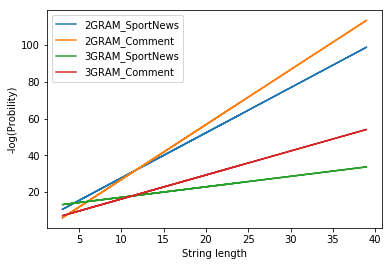

In [180]:
plt.plot(x,f2_(x),label = '2GRAM_SportNews')
plt.plot(x,f2(x),label = '2GRAM_Comment')
plt.plot(x,f3_(x),label = '3GRAM_SportNews')
plt.plot(x,f3(x),label = '3GRAM_Comment')
plt.xlabel('String length')
plt.ylabel('-log(Probility)')
plt.legend()

## 关于2gram

#### Q: 2gram模型存在什么问题？
    
#### A: 

#### 1.句子越长，句子计算概率呈指数递减，对现实合理的句子判断出错概率越高；
      
#### 2.不同场景测试集，性能存在较大差异；

#### Q: 解决办法？
    
#### A：

#### 1.采用3GRAM或者提升N，但需权衡计算时长与精度两项指标；

#### 2.针对特定的训练集，测试集采用相似场景数据集；
    
#### 3.word2vec or RNN？（后续待尝试）

# 3.问答作业

### 0. Can you come up out 3 sceneraies which use AI methods?

#### A: 1. 语音机器人和工业机器人  2. 亚马逊和网飞的推荐系统  3. 金融里的量化领域

### 1. How do we use Github; Why do we use Jupyter and Pycharm;

#### A: 关于使用github：
#### 1. 建立自己的repo，做项目的时候可以上传github实时追踪进度，并且也可以与他人交流学习
#### 2. 做研发的时候，可在github上搜索相关主题，fork有价值的代码
#### 关于使用Jupyter：Jupyter适合演示和测试，在做小型项目时候很NICE
#### 关于使用Pycharm：Pycharm是一个流行且易用的成熟IDE，一般用来开发大型项目 

### 2. What's the Probability Model?

#### A : Probability Model 计算一句话出现的概率,计算公式:P(W1...Wn) = P(W1)P(W2|W1)P(W3|W1W2)P(W4|W1W2W3)...P(Wn|W1W2...Wn-1)

### 3. Can you came up with some sceneraies at which we could use Probability Model?

#### A: 编译器；机器翻译；语音机器人；输入法等

### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

#### A: 使用概率模型的原因——语言具有：
    
#### 1.语法多样且复杂(logic)；2.语言具有多样性(diversity)；3.语言结构不规则(unstructured)

#### 导致基于模式匹配和规则树设计变得复杂且很难通用，而采用概率模型，就可以使用预训练语料4，统计词组出现的概率，计算生成概率来生

#### 成合理的句子，这种方法更具有通用性。

## 5. What's the Language Model;

#### A: Language Model -- 用f(String)∈(0,1)来评估一句话是否是人话，越接近1越真，反之越假。

## 6. Can you came up with some sceneraies at which we could use Language Model?

#### A: 语音识别，机器翻译，siri，文本分析

## 7. What's the 1-gram language model;

#### A: 1-gram是指在一句话里，假定每个词出现都是相互独立的，数学模型--P(W1...Wn) = P(W1)P(W2)P(W3)P(W4)...P(Wn)

## 8. What's the disadvantages and advantages of 1-gram language model;

#### A：优点：易于计算  缺点：句子都具有内在的语法逻辑，在现实中句中各词都不是独立的，这样会带来很大的误差。

## 9. What't the 2-gram models;

#### A: 2-gram是指在一句话里，假定每个词出现都只与前一个词相关，数学模型--P(W1...Wn) = P(W1)P(W2|W1)P(W3|W2)...P(Wn|Wn-1)